In [1]:
import pandas as pd
import numpy as np
from numpy.typing import ArrayLike, NDArray
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
from math import sqrt

In [2]:
# read data into dataframes
instances = {
    "A": pd.read_csv("data/TSPA.csv", sep=';', header=None, names=["x", "y", "cost"]),
    "B": pd.read_csv("data/TSPB.csv", sep=';', header=None, names=["x", "y", "cost"]),
    "C": pd.read_csv("data/TSPC.csv", sep=';', header=None, names=["x", "y", "cost"]),
    "D": pd.read_csv("data/TSPD.csv", sep=';', header=None, names=["x", "y", "cost"]),
}

In [3]:
def calculate_distance_matrix(df: pd.DataFrame) -> NDArray[np.int32]:
    """
    Calculate the distance matrix from the dataframe.
    The dataframe contains 'x' and 'y' columns for the coordinates.
    The distances are Euclidean, rounded to the nearest integer + the cost of the destination node.
    """
    coordinates = df[['x', 'y']].to_numpy()
    dist_matrix = np.zeros(shape=(len(df), len(df)))
    for i in range(len(coordinates)):
        for j in range(len(coordinates)):
            dist_matrix[i, j] = round(sqrt((coordinates[i, 0] - coordinates[j, 0])**2 + (coordinates[i, 1] - coordinates[j, 1])**2))
    return dist_matrix

In [4]:
distances_matrices = {
    "A": calculate_distance_matrix(instances["A"]),
    "B": calculate_distance_matrix(instances["B"]),
    "C": calculate_distance_matrix(instances["C"]),
    "D": calculate_distance_matrix(instances["D"])
}

costs = {
    "A": instances["A"]["cost"].to_numpy(),
    "B": instances["B"]["cost"].to_numpy(),
    "C": instances["C"]["cost"].to_numpy(),
    "D": instances["D"]["cost"].to_numpy()
}

In [11]:
def visualize_selected_route(
    selected_nodes_indices: ArrayLike, 
    dataframe: pd.DataFrame,
    title: str) -> None:
    """
    Visualize the selected route returned by the algorithm, including the cost of each node represented by a colormap.

    Parameters:
    selected_nodes_indices (list): Indices of the selected nodes in the route.
    dataframe (DataFrame): DataFrame containing 'x', 'y', and 'cost' columns for each node.
    """
    x = dataframe["x"].to_numpy()
    y = dataframe["y"].to_numpy()
    costs = dataframe["cost"].to_numpy()

    cmap = plt.cm.get_cmap('viridis')
    norm = plt.Normalize(vmin=min(costs), vmax=max(costs))

    plt.figure(figsize=(15, 10))
    scatter = plt.scatter(x, y, c=costs, cmap=cmap, norm=norm, s=100)
    plt.colorbar(scatter, label='Node Cost')

    for i, node in enumerate(selected_nodes_indices):
        start_node = selected_nodes_indices[i]
        end_node = selected_nodes_indices[(i + 1) % len(selected_nodes_indices)]
        plt.plot([x[start_node], x[end_node]], [y[start_node], y[end_node]], 'k-', lw=1)
        plt.text(x[start_node], y[start_node], str(start_node), fontsize=14)

    plt.title(title, fontsize=18)
    plt.xlabel('X Coordinate', fontsize=14)
    plt.ylabel('Y Coordinate', fontsize=14)
    plt.grid(True)
    plt.show()

In [7]:
def objective_function(solution: list[int], dist_matrix: list[list[int]], costs: list[int]) -> int:
    total_score = 0
    n = len(solution)
    for x in range(n):
        total_score += dist_matrix[solution[x - 1]][solution[x]]
        total_score += costs[solution[x]]
    return total_score

In [39]:
def destroy(current_solution: list[int]):
    n = len(current_solution)

    subset_length = random.randint(int(0.2 * n), int(0.3 * n))
    start_index = random.randint(0, n)
    start=current_solution[start_index-1]
    if start_index + subset_length > n:
        solution = current_solution[start_index+subset_length-n:start_index]
    else: 
        solution = current_solution[:start_index] + current_solution[start_index + subset_length:]
    # print(solution)
    return solution, start_index

In [126]:
def destroy(current_solution: list[int],
            distance_matrix: list[list[int]],
            costs: list[int]):
    n = len(current_solution)

    subset_length = 25
    
    worst_subpath_delta = objective_function(current_solution[:subset_length], distance_matrix, costs)
    worst_subpath = current_solution[:subset_length]
    selected_solution = current_solution[subset_length:]
    start = worst_subpath[-1]
    worst_start = start
    
    previous_subpath_delta = worst_subpath_delta
    
    for start_index in range(1, n):
        start=current_solution[start_index-1]
        
        if start_index + subset_length > n:
            solution = current_solution[start_index+subset_length-n:start_index]
            subpath = current_solution[start_index:] + current_solution[:subset_length - (n - start_index)]
        else: 
            solution = current_solution[:start_index] + current_solution[start_index + subset_length:]
            subpath = current_solution[start_index:start_index + subset_length]
        delta = (
            -distance_matrix[start][current_solution[start_index]]
            +distance_matrix[current_solution[(start_index + subset_length-2) %n]][current_solution[(start_index + subset_length -1) % n]]
            -costs[current_solution[start]]
            +costs[current_solution[(start_index + subset_length + 1) % n]]
        )
        subpath_score = previous_subpath_delta + delta
        if subpath_score > worst_subpath_delta:
            worst_subpath_delta = subpath_score
            worst_subpath = subpath
            selected_solution = solution
            worst_start = start
        
        previous_subpath_delta = subpath_score
        
    return selected_solution, worst_start

In [127]:
a = [i for i in range(100)]
destroy(a, distances_matrices["A"], costs["A"])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
[25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99],
 8)

In [97]:
def generate_greedy_weight_regret(dist_matrix, costs, current_solution, num_select, a, start_idx):
    num_nodes = dist_matrix.shape[0]
    selected_nodes = current_solution[start_idx:]+current_solution[:start_idx]
    # print(selected_nodes)
    start=selected_nodes[-1]
    unselected_nodes = set(range(num_nodes)) - set(current_solution)
    initial_score=objective_function(selected_nodes,dist_matrix,costs)
    

    # Continue until we've selected the required number of nodes
    while len(selected_nodes) < num_select:
        score_node = None
        score_position = None
        best_score= float('-inf')
        score_best_increase = float('inf')
        # Evaluate the insertion of each unselected node
        # print(len(selected_nodes))
        # print(selected_nodes)
        for node in unselected_nodes:
            best_node = None
            best_position = None
            best_min_increase = float('inf')
            second_best_min_increase = float('inf')
            # Try inserting between each pair of consecutive nodes in the cycle
            for i in range(selected_nodes.index(start),len(selected_nodes)):
                # Calculate the increase in distance
                
                next_i = (i + 1) % len(selected_nodes)
                # print(selected_nodes.index(start))
                increase = (dist_matrix[selected_nodes[i], node] +
                            dist_matrix[node, selected_nodes[next_i]]+
                            costs[node]-
                            dist_matrix[selected_nodes[i], selected_nodes[next_i]])
                # print(f"Insert node {node} between {selected_nodes[i]} and {selected_nodes[next_i]}: {increase}")
                # Check if it is the best position
                if increase < second_best_min_increase: 
                    if increase < best_min_increase:
                        best_min_increase = increase
                        best_node = node
                        best_position = next_i 
                         # Insert before next_i
                        if second_best_min_increase == float('inf'):
                            second_best_min_increase = increase
                        # print(f"Update best_min_increase of Node {node} to {increase}")
                    #or the second best position
                    else: 
                        second_best_min_increase = increase
                        # print(f"Update second_best_min_increase of Node {node} to {increase}")
            #for a given unselected node after checking all of the positions and finding two best increases, we calculate regret
            regret= second_best_min_increase - best_min_increase
            score = a * regret - (1-a)*best_min_increase
            # print(f"Node {node} score: {score}")
            # for keeping track of the best regret so far and best corresponding node, position and increase
            if score > best_score:
                best_score = score
                score_node =  best_node
                score_position = best_position 
                score_best_increase = best_min_increase
        
                    

        # Insert the best node into the cycle
        if score_position==0:
            selected_nodes.append(score_node)
            # print(selected_nodes, score_node)
        else:
            selected_nodes.insert(score_position, score_node)
        # print(selected_nodes,score_node)
        unselected_nodes.remove(score_node)
        
    return selected_nodes

In [94]:
sol = [0, 3,
 19,
 29,
 9]

start_index = len(sol)
solution = generate_greedy_weight_regret(distances_matrices["A"], costs["A"], sol, 30, 0.5, start_index)

[0, 3, 19, 29, 9]
Insert node 1 between 9 and 0: 1467.0
Update best_min_increase of Node 1 to 1467.0
Node 1 score: -733.5
Insert node 2 between 9 and 0: 1512.0
Update best_min_increase of Node 2 to 1512.0
Node 2 score: -756.0
Insert node 4 between 9 and 0: 207.0
Update best_min_increase of Node 4 to 207.0
Node 4 score: -103.5
Insert node 5 between 9 and 0: 2525.0
Update best_min_increase of Node 5 to 2525.0
Node 5 score: -1262.5
Insert node 6 between 9 and 0: 2003.0
Update best_min_increase of Node 6 to 2003.0
Node 6 score: -1001.5
Insert node 7 between 9 and 0: 3595.0
Update best_min_increase of Node 7 to 3595.0
Node 7 score: -1797.5
Insert node 8 between 9 and 0: 2533.0
Update best_min_increase of Node 8 to 2533.0
Node 8 score: -1266.5
Insert node 10 between 9 and 0: 3179.0
Update best_min_increase of Node 10 to 3179.0
Node 10 score: -1589.5
Insert node 11 between 9 and 0: 2356.0
Update best_min_increase of Node 11 to 2356.0
Node 11 score: -1178.0
Insert node 12 between 9 and 0: 3315

In [49]:
a = [1,2,3,4,5,6,7,8,9]
inx = 9
print(a[inx:]+a[:inx])

[1, 2, 3, 4, 5, 6, 7, 8, 9]


C:\Users\janko\AppData\Local\Temp\ipykernel_5644\2822639263.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')


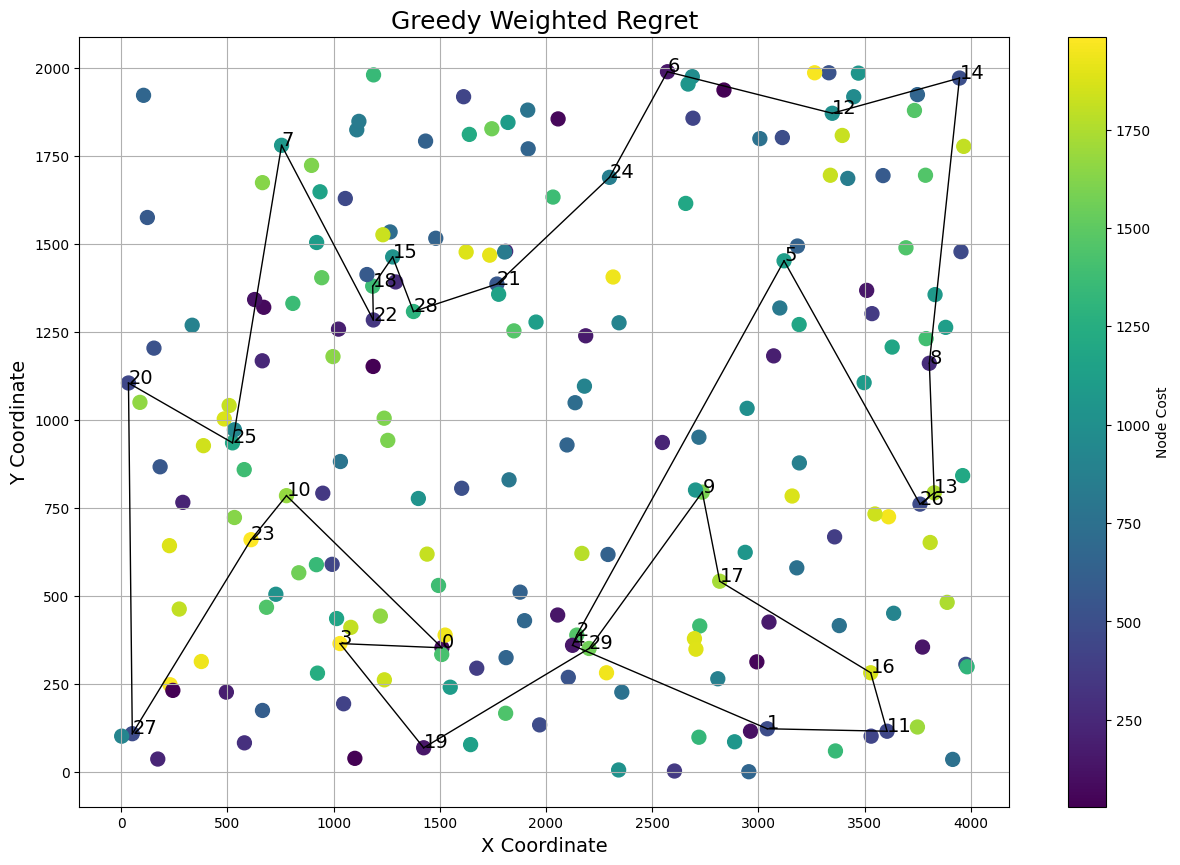

In [95]:
visualize_selected_route(solution, instances["A"], "Greedy Weighted Regret")

In [96]:
objective_function(solution, distances_matrices["A"], costs["A"])

46034.0

In [98]:
sol = [95, 169, 8, 124, 80, 14, 111, 94, 72, 190, 98, 66, 172, 156, 6, 24, 45, 186, 127, 88, 153, 161, 76, 21]

repaired_sol = generate_greedy_weight_regret(distances_matrices["A"], costs["A"], sol, 100, 0.5, len(sol))

In [100]:
objective_function(repaired_sol, distances_matrices["A"], costs["A"])

83183.0

C:\Users\janko\AppData\Local\Temp\ipykernel_5644\2822639263.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')


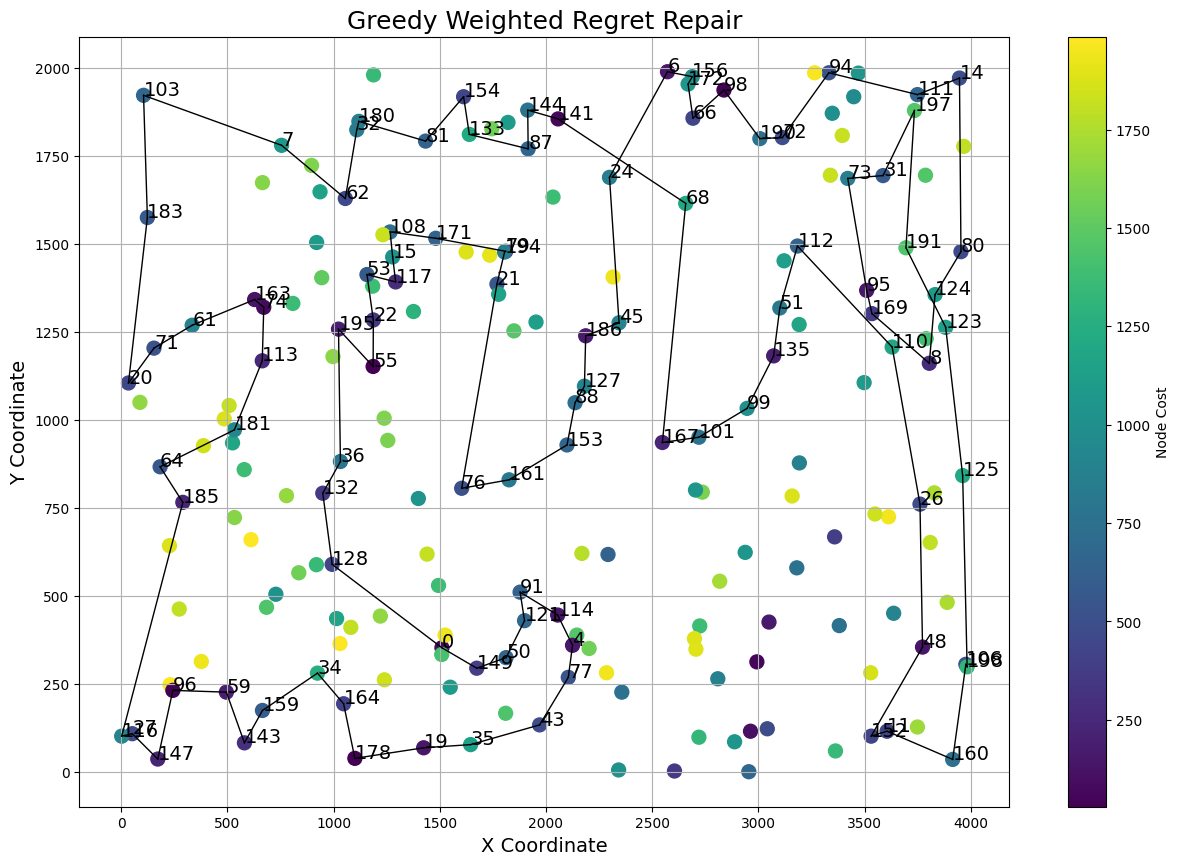

In [99]:
visualize_selected_route(repaired_sol, instances["A"], "Greedy Weighted Regret Repair")